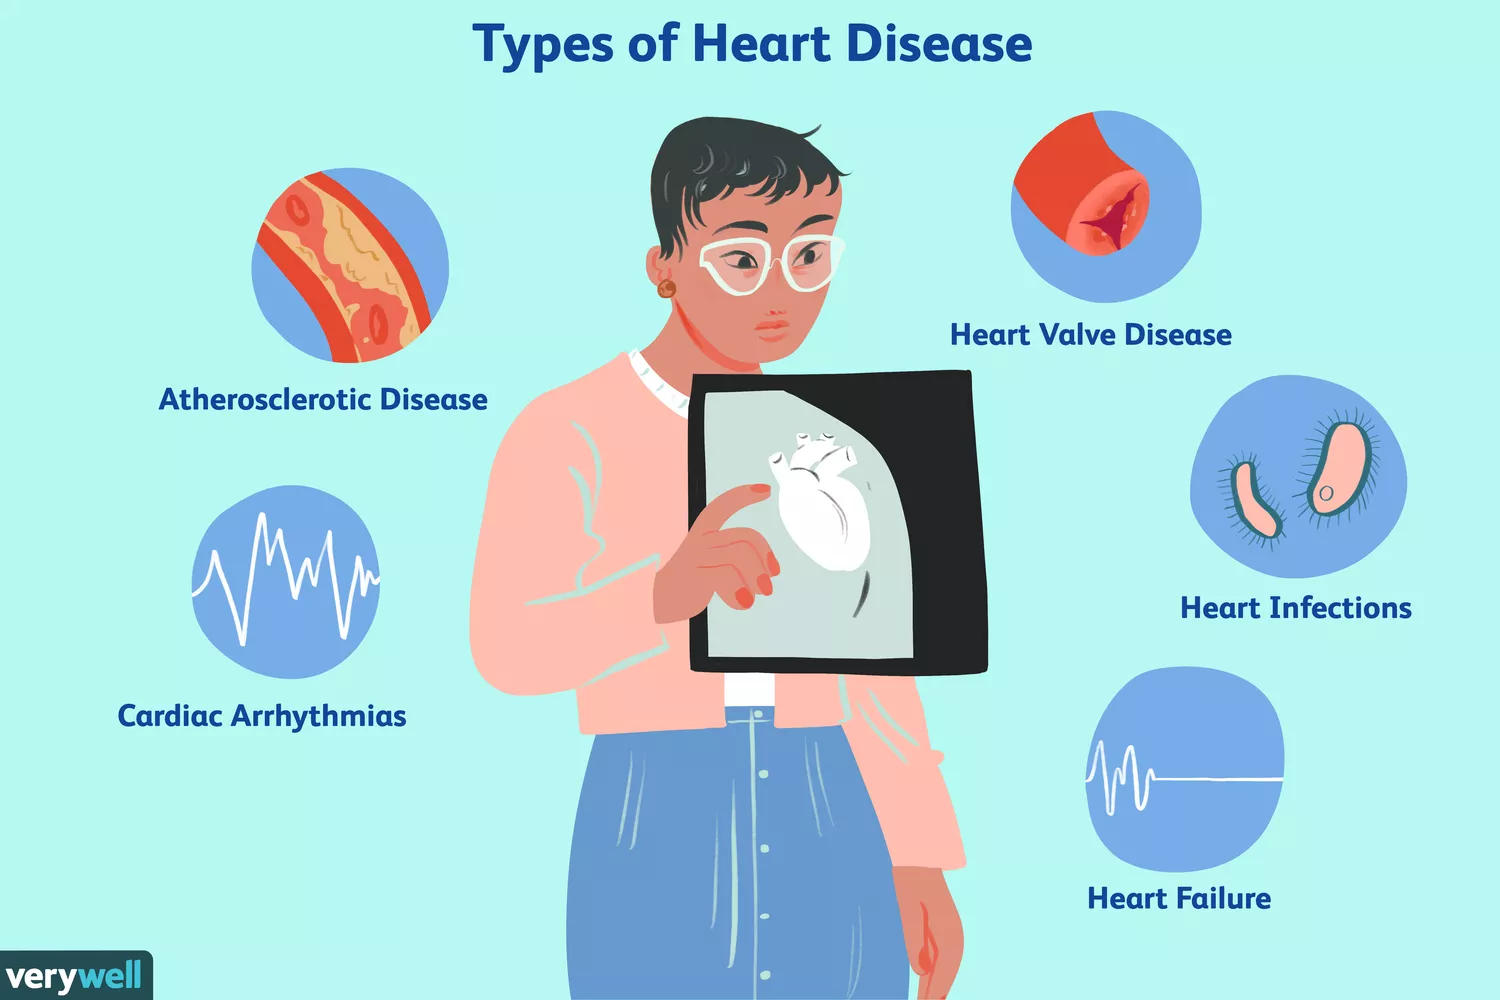

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
hd=pd.read_csv('heart_disease.csv')
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
predicted target - have disease of 5 levels (0=no)

In [5]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      200 non-null    int64 
 1   sex                      200 non-null    int64 
 2   cp                       200 non-null    int64 
 3   trestbps                 200 non-null    object
 4   chol                     200 non-null    object
 5   fbs                      200 non-null    object
 6   restecg                  200 non-null    int64 
 7   thalach                  200 non-null    object
 8   exang                    200 non-null    object
 9   oldpeak                  200 non-null    object
 10  slope                    200 non-null    object
 11  ca                       200 non-null    object
 12  thal                     200 non-null    object
 13  the predicted attribute  200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+

In [6]:
hd.shape

(200, 14)

some of them are object change them firstly into empty values than conecrt them into integers after that the missing values were found by using mean,mode values or through using linear regression or k nearest neighbours

In [7]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'the predicted attribute'],
      dtype='object')

In [8]:
hd['trestbps'].value_counts()

?      56
120    16
130    15
140    10
150     9
110     9
160     8
122     6
142     5
136     4
170     4
128     4
134     4
144     4
126     4
124     4
158     3
132     3
154     2
125     2
152     2
112     2
116     2
155     2
104     2
138     2
180     2
156     1
102     1
178     1
0       1
135     1
106     1
172     1
127     1
100     1
118     1
114     1
146     1
190     1
96      1
Name: trestbps, dtype: int64

In these 56 ? are present so replace them by converting into mode 

In [9]:
hd['chol'].value_counts()

0      49
?       7
220     4
203     4
258     4
       ..
281     1
193     1
161     1
349     1
142     1
Name: chol, Length: 100, dtype: int64

In these 7 ? are present

In [10]:
hd['fbs'].value_counts()

0    125
1     68
?      7
Name: fbs, dtype: int64

In these 7 ? are present

In [11]:
hd['thalach'].value_counts()

?      53
140    12
120    12
110     8
130     6
112     6
150     4
100     4
160     4
105     4
118     4
128     4
106     3
84      3
108     3
122     3
125     3
148     3
86      3
117     3
135     3
102     3
119     2
98      2
138     2
127     2
111     2
129     2
96      2
80      2
154     2
180     2
165     2
88      1
123     1
93      1
131     1
162     1
121     1
99      1
126     1
151     1
161     1
73      1
132     1
107     1
141     1
159     1
157     1
144     1
69      1
124     1
133     1
155     1
94      1
145     1
115     1
97      1
149     1
113     1
Name: thalach, dtype: int64

In these 53 ? are present

In [12]:
hd['exang'].value_counts()

1    95
?    53
0    52
Name: exang, dtype: int64

in these also 53 ? are present

In [13]:
hd['oldpeak'].value_counts()

?       56
0       40
2       25
1.5     21
1       18
3       13
2.5      9
0.5      7
4        4
1.3      2
1.7      1
-0.5     1
0.8      1
3.5      1
1.6      1
Name: oldpeak, dtype: int64

in these 56 ? are present

In [14]:
hd['slope'].value_counts() 

?    102
2     53
3     29
1     16
Name: slope, dtype: int64

higher ? values

In [15]:
hd['ca'].value_counts()

?    198
0      2
Name: ca, dtype: int64

198 ? in ca

In [16]:
hd['thal'].value_counts()

?    166
7     22
6      8
3      4
Name: thal, dtype: int64

166 ? in thal

8 columns has ? values replace by doing mode

lets replace and convert them to float values

In [17]:
hd_new=hd.replace('?','NaN').astype(float)

In [18]:
hd_new.dtypes

age                        float64
sex                        float64
cp                         float64
trestbps                   float64
chol                       float64
fbs                        float64
restecg                    float64
thalach                    float64
exang                      float64
oldpeak                    float64
slope                      float64
ca                         float64
thal                       float64
the predicted attribute    float64
dtype: object

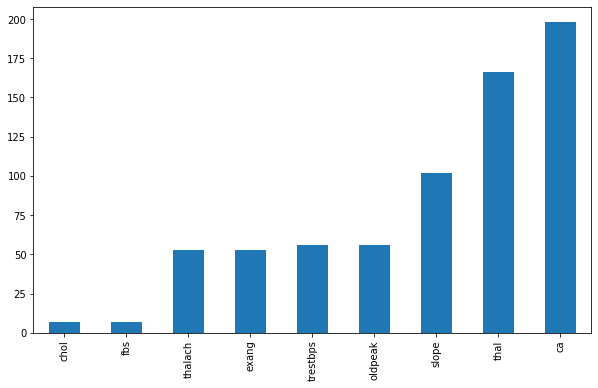

In [19]:
#lets check the missing values
missing=hd_new.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
plt.figure(figsize=(10,6))
missing.plot.bar()

Among all ca has higher missing values upto 198

In [20]:
#lets check th median values and replace it
hd_new['chol'].mean()

178.7461139896373

In [21]:
hd_new['fbs'].median()

0.0

In [22]:
hd_new['thalach'].mean()

122.79591836734694

In [23]:
hd_new['exang'].median()

1.0

In [24]:
hd_new['oldpeak'].mean()

1.3208333333333333

In [25]:
hd_new['thal'].mode()

0    7.0
dtype: float64

In [26]:
hd_new['slope'].mode()

0    2.0
dtype: float64

In [27]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
imputer.fit_transform(hd_new)

array([[63. ,  1. ,  4. , ...,  0. ,  6.6,  2. ],
       [44. ,  1. ,  4. , ...,  0. ,  6.8,  0. ],
       [60. ,  1. ,  4. , ...,  0. ,  6.6,  2. ],
       ...,
       [55. ,  1. ,  4. , ...,  0. ,  6. ,  2. ],
       [58. ,  1. ,  4. , ...,  0. ,  6.2,  0. ],
       [62. ,  1. ,  2. , ...,  0. ,  6.6,  1. ]])

In [28]:
#lets replace this NaN values into mean and median 
new_hd=hd_new.fillna({
    'chol':178.7,
        'fbs':0.0,
        'thalach':122.7,
         'exang':1.0,
         'trestbps':133.7,
          'oldpeak':1.3,
          'thal':7.0,
           'slope':2.0
})

In [29]:
new_hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,the predicted attribute
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,NaN,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,NaN,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,NaN,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,NaN,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,NaN,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,NaN,7.0,1.0
196,62.0,1.0,1.0,133.7,139.0,0.0,1.0,122.7,1.0,1.3,2.0,NaN,7.0,0.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,NaN,6.0,2.0
198,58.0,1.0,4.0,133.7,385.0,1.0,2.0,122.7,1.0,1.3,2.0,NaN,7.0,0.0


In [30]:
#lets drop the ca,thalch columns because 198,166 missing values out of 200 so this is no use for our data set
df=new_hd.drop(columns=['ca'])

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,the predicted attribute
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0,0.0


In [32]:
df.isnull().sum()

age                        0
sex                        0
cp                         0
trestbps                   0
chol                       0
fbs                        0
restecg                    0
thalach                    0
exang                      0
oldpeak                    0
slope                      0
thal                       0
the predicted attribute    0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      200 non-null    float64
 1   sex                      200 non-null    float64
 2   cp                       200 non-null    float64
 3   trestbps                 200 non-null    float64
 4   chol                     200 non-null    float64
 5   fbs                      200 non-null    float64
 6   restecg                  200 non-null    float64
 7   thalach                  200 non-null    float64
 8   exang                    200 non-null    float64
 9   oldpeak                  200 non-null    float64
 10  slope                    200 non-null    float64
 11  thal                     200 non-null    float64
 12  the predicted attribute  200 non-null    float64
dtypes: float64(13)
memory usage: 20.4 KB


In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,the predicted attribute
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,133.746000,178.744500,0.340000,0.735000,122.77050,0.740000,1.315000,2.065000,6.880000,1.520000
std,7.811697,0.171015,0.795701,18.257529,112.011633,0.474898,0.683455,18.83574,0.439735,0.937802,0.471046,0.589353,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.00000,0.000000,-0.500000,1.000000,3.000000,0.000000
25%,55.000000,1.000000,3.000000,125.750000,129.250000,0.000000,0.000000,112.00000,0.000000,1.000000,2.000000,7.000000,0.000000
50%,60.000000,1.000000,4.000000,133.700000,214.000000,0.000000,1.000000,122.70000,1.000000,1.300000,2.000000,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,254.500000,1.000000,1.000000,130.00000,1.000000,2.000000,2.000000,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.00000,1.000000,4.000000,3.000000,7.000000,4.000000


THERE ARE LOT OF DIFFERENCE BETWEEN MEAN AND MINIMUM VALUES,75% PERCENTILE AND MAX HAS NEARBY VALUES

In [35]:
#lets check correlation
df_cor=df.corr()
df_cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,the predicted attribute
age,1.000000,0.034230,-0.038280,0.181563,0.066968,0.135728,0.002400,-0.149967,0.129027,0.157116,0.107135,0.106313,0.287289
sex,0.034230,1.000000,0.038036,0.012515,-0.096153,-0.059400,0.060621,-0.001680,0.029402,0.096819,0.086709,-0.035898,0.147470
cp,-0.038280,0.038036,1.000000,0.074976,0.065814,-0.044416,0.034790,-0.123090,0.089904,0.042998,0.059460,-0.009430,0.168210
trestbps,0.181563,0.012515,0.074976,1.000000,0.150096,0.192227,0.091995,-0.013011,0.205357,0.115542,0.083557,0.068606,0.141793
chol,0.066968,-0.096153,0.065814,0.150096,1.000000,0.173393,0.024252,-0.041437,0.117051,0.001066,0.043365,-0.037538,0.076440
fbs,0.135728,-0.059400,-0.044416,0.192227,0.173393,1.000000,0.170616,0.037811,-0.176144,-0.106289,-0.009435,-0.033036,0.048940
restecg,0.002400,0.060621,0.034790,0.091995,0.024252,0.170616,1.000000,0.012271,-0.063203,-0.107450,-0.039881,0.020460,-0.032800
thalach,-0.149967,-0.001680,-0.123090,-0.013011,-0.041437,0.037811,0.012271,1.000000,-0.070944,0.171340,-0.107053,-0.178132,-0.078876
exang,0.129027,0.029402,0.089904,0.205357,0.117051,-0.176144,-0.063203,-0.070944,1.000000,0.286117,0.106259,0.150467,0.206541
oldpeak,0.157116,0.096819,0.042998,0.115542,0.001066,-0.106289,-0.107450,0.171340,0.286117,1.000000,0.293546,0.156928,0.379391


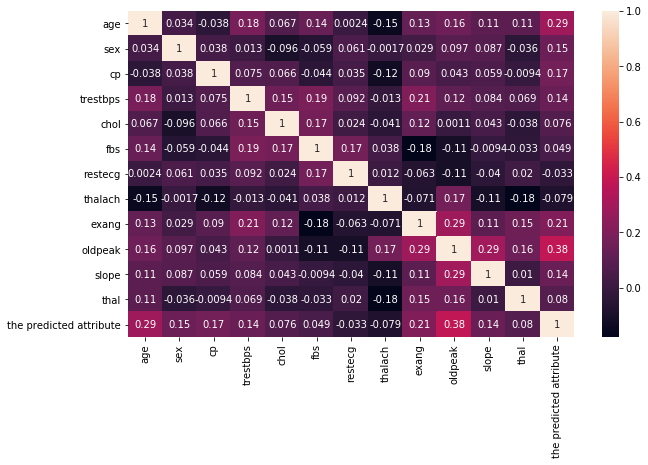

In [36]:
#lets see clearly in heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_cor,annot=True,cmap='rocket')
plt.show()

The darker color of black shows negative correlation where as lighter color shows positive correlation

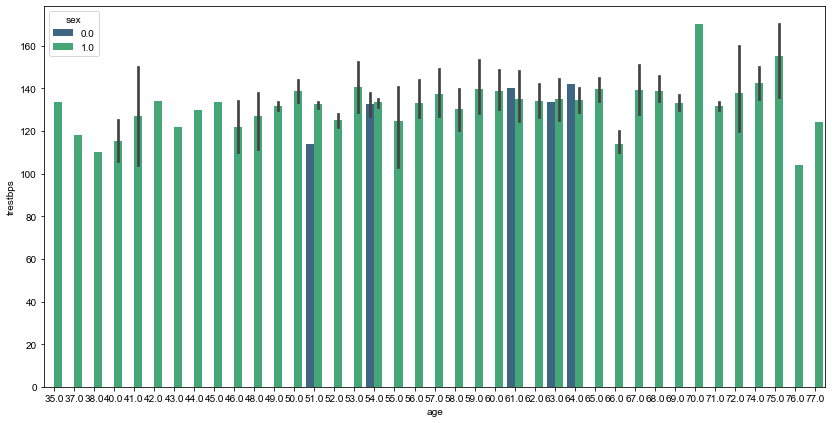

In [37]:
plt.figure(figsize=(14,7))
sns.barplot(x='age',y='trestbps',hue='sex',data=df,palette='viridis')
sns.set(style='whitegrid')
plt.show()

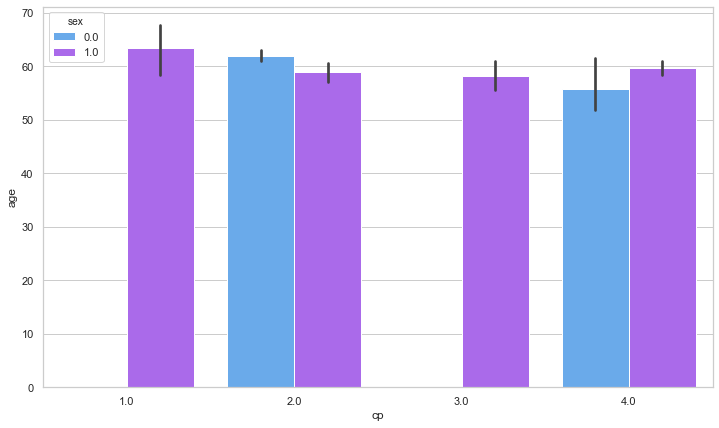

In [38]:
plt.figure(figsize=(12,7))
sns.barplot(x='cp',y='age',hue='sex',data=df,palette='cool')
plt.show()

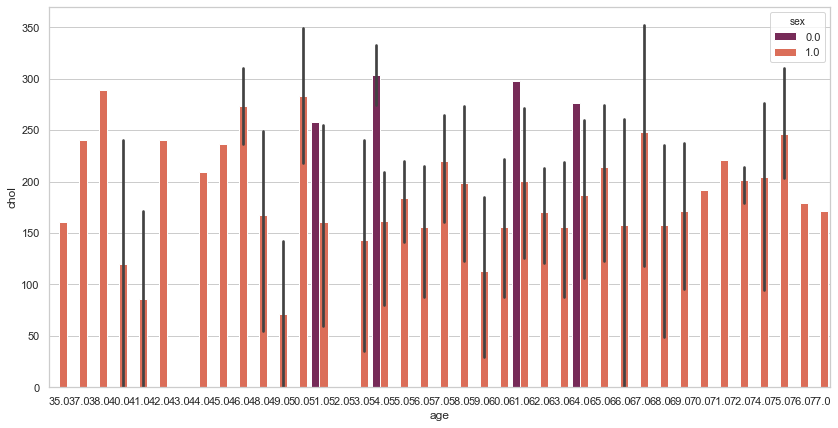

In [39]:
plt.figure(figsize=(14,7))
sns.barplot(x='age',y='chol',hue='sex',data=df,palette='rocket')
plt.show()

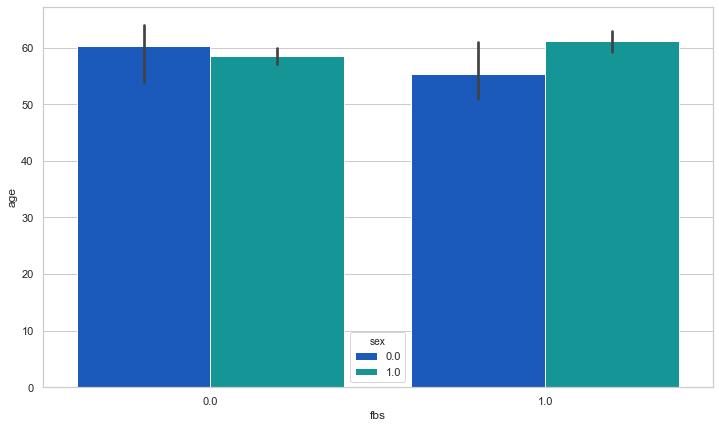

In [40]:
plt.figure(figsize=(12,7))
sns.barplot(x='fbs',y='age',hue='sex',data=df,palette='winter')
plt.show()

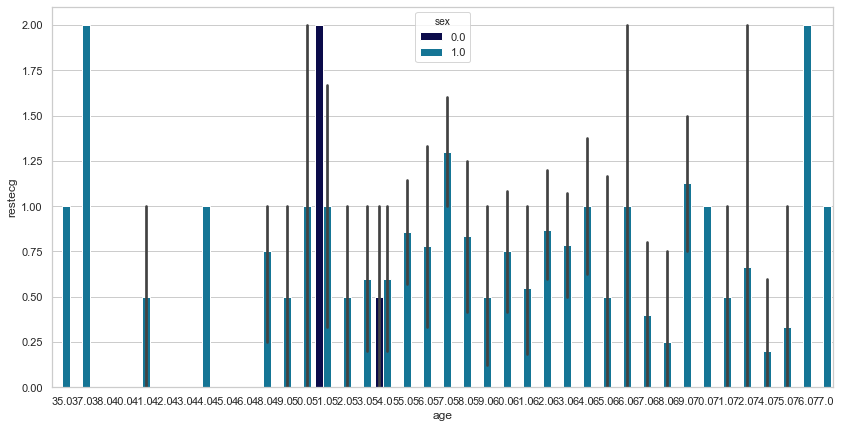

In [41]:
plt.figure(figsize=(14,7))
sns.barplot(x='age',y='restecg',hue='sex',data=df,palette='ocean')
plt.show()

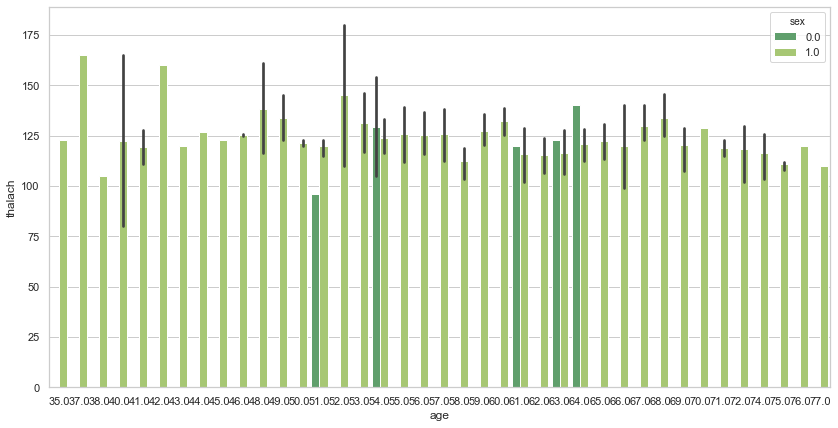

In [42]:
plt.figure(figsize=(14,7))
sns.barplot(x='age',y='thalach',hue='sex',data=df,palette='summer')
plt.show()

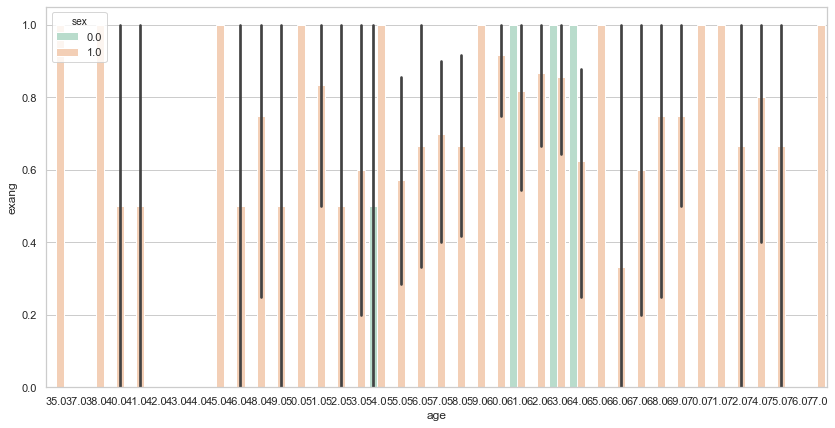

In [43]:
plt.figure(figsize=(14,7))
sns.barplot(x='age',y='exang',hue='sex',data=df,palette='Pastel2')
plt.show()

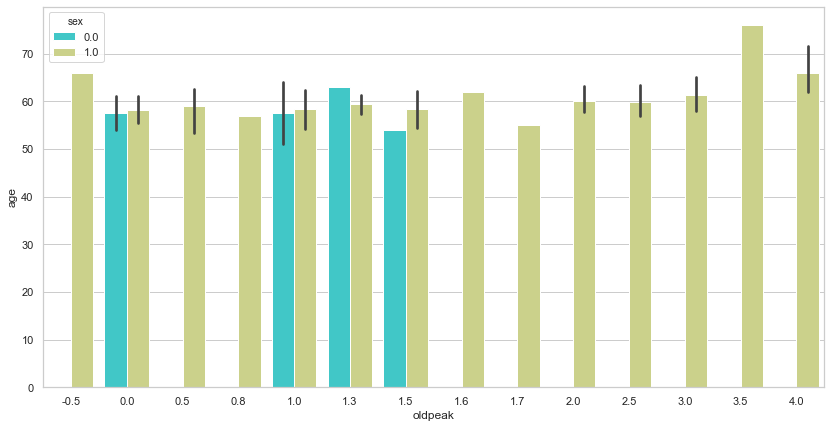

In [44]:
plt.figure(figsize=(14,7))
sns.barplot(x='oldpeak',y='age',hue='sex',data=df,palette='rainbow')
plt.show()

In [45]:
df_class=df.groupby('the predicted attribute',axis=0).sum()

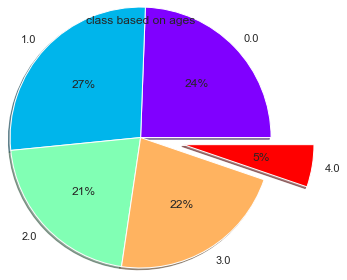

In [46]:
df_class['age'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='rainbow')
plt.title('class based on ages')
plt.show()

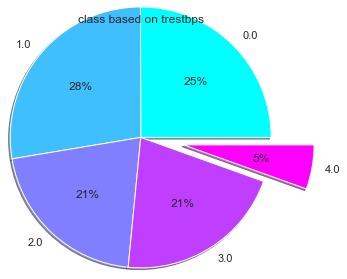

In [47]:
df_class['trestbps'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='cool')
plt.title('class based on trestbps')
plt.show()

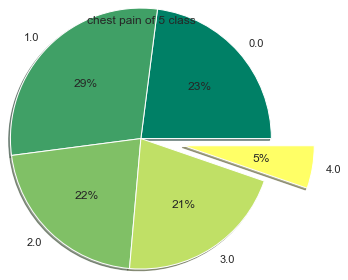

In [48]:
df_class['cp'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='summer')
plt.title('chest pain of 5 class')
plt.show()

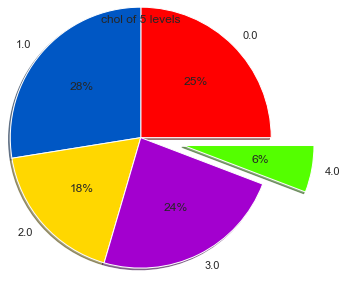

In [49]:
df_class['chol'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='prism')
plt.title('chol of 5 levels')
plt.show()

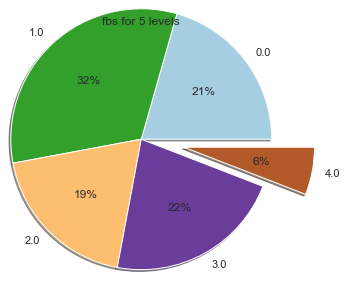

In [50]:
df_class['fbs'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='Paired')
plt.title('fbs for 5 levels')
plt.show()

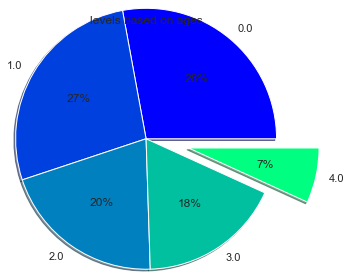

In [51]:
df_class['restecg'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='winter')
plt.title('levels based on ages')
plt.show()

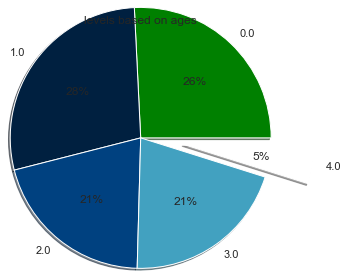

In [52]:
df_class['thalach'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='ocean')
plt.title('levels based on ages')
plt.show()

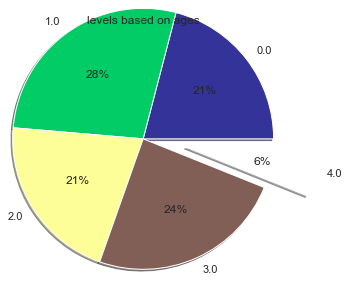

In [53]:
df_class['exang'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='terrain')
plt.title('levels based on ages')
plt.show()

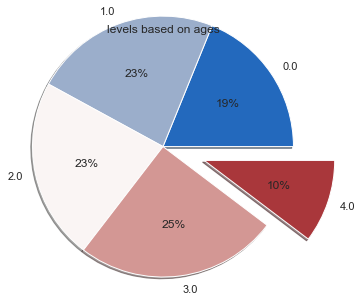

In [54]:
df_class['oldpeak'].plot(kind='pie',radius=1.5,autopct='%0.0f%%',shadow=True,explode=[0,0,0,0,0.5],cmap='vlag')
plt.title('levels based on ages')
plt.show()

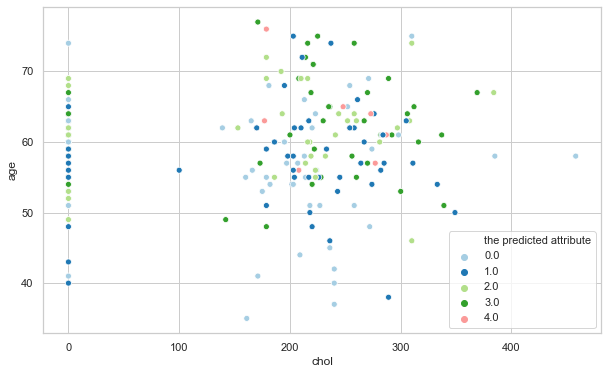

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='chol',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

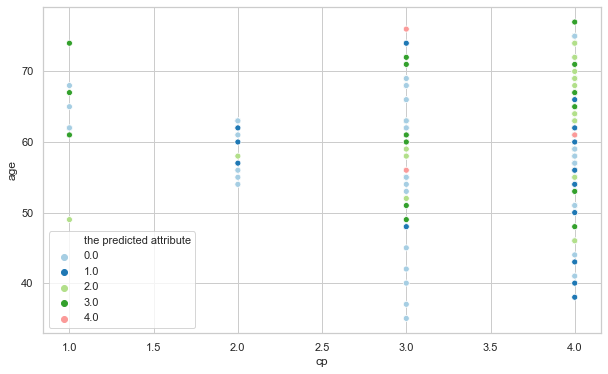

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='cp',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

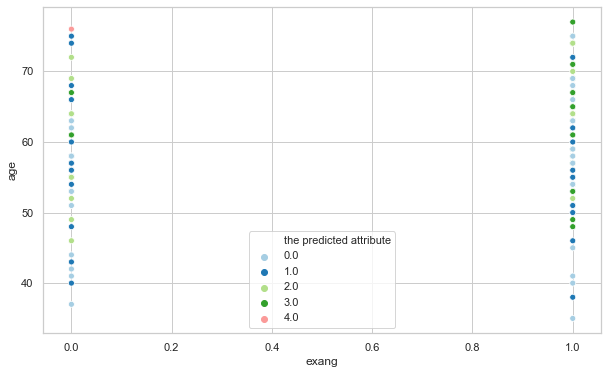

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='exang',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

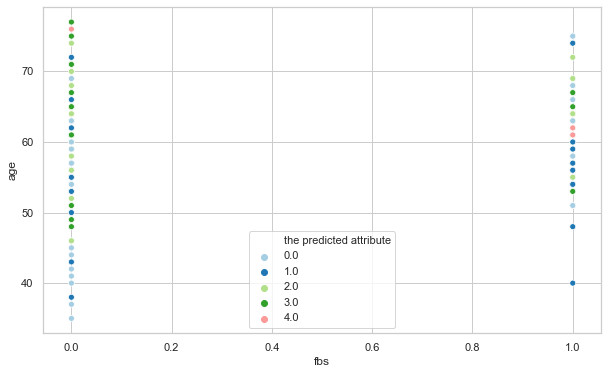

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='fbs',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

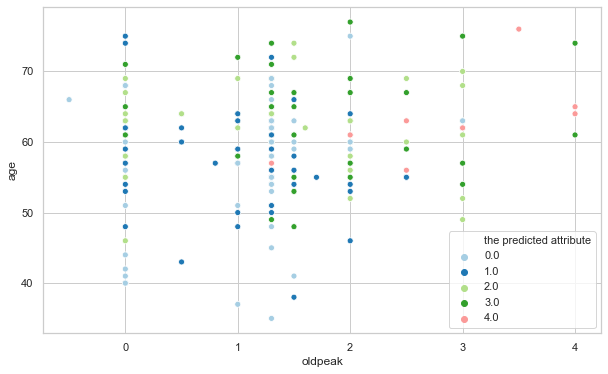

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='oldpeak',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

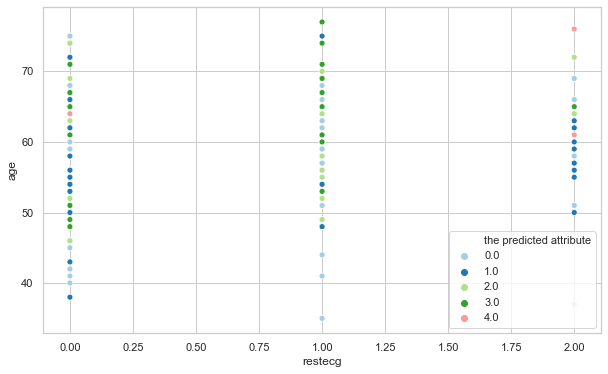

In [60]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='restecg',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

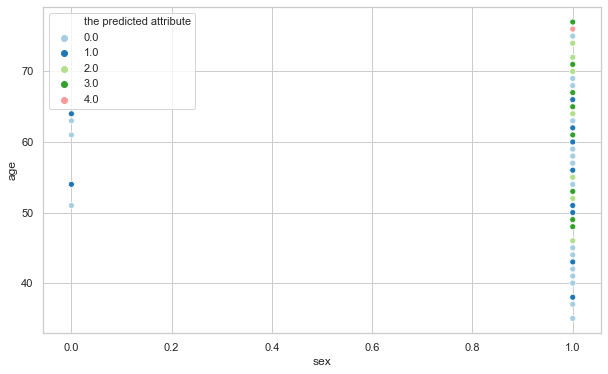

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sex',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

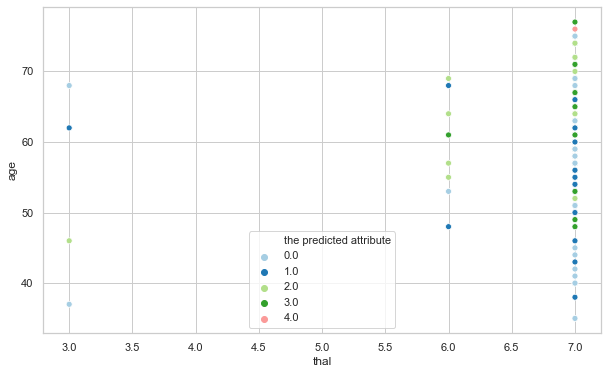

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='thal',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

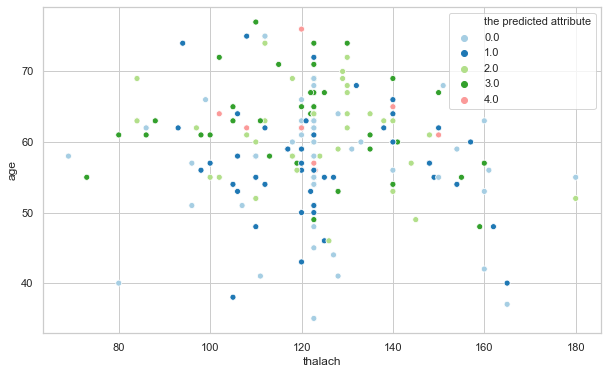

In [63]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='thalach',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

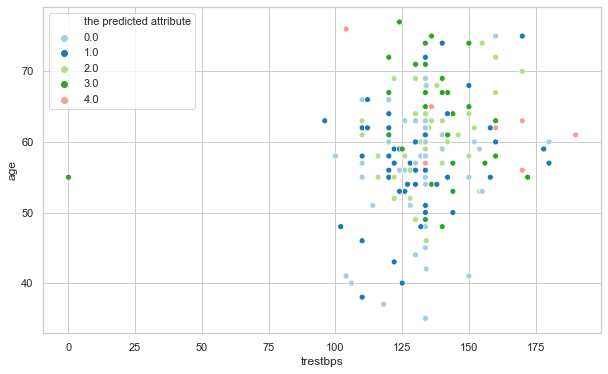

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='trestbps',y='age',hue='the predicted attribute',data=df,palette='Paired')
plt.show()

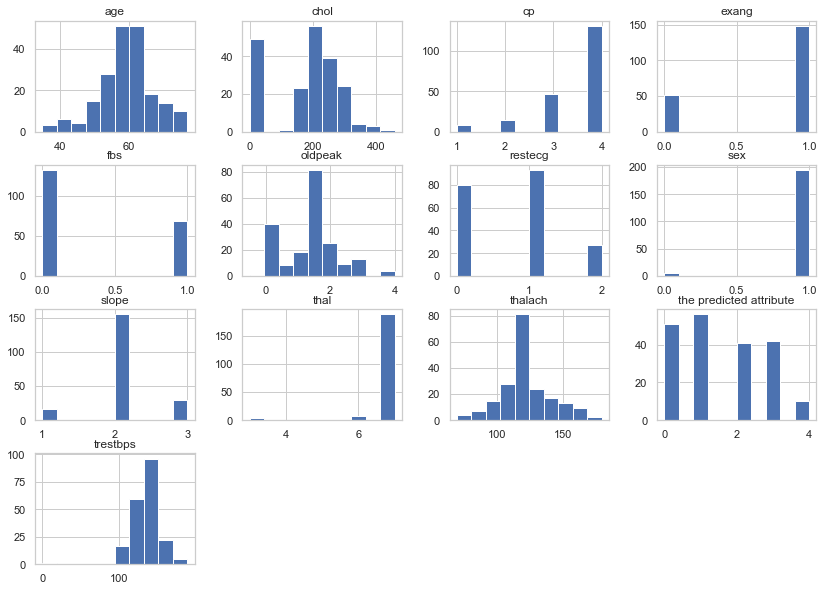

In [65]:
df.hist(figsize=(14,10))
plt.show()

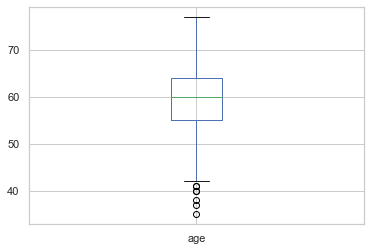

In [66]:
#lets check outliers
df['age'].plot.box()

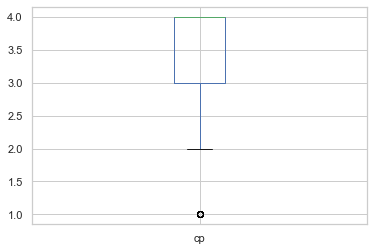

In [67]:
df['cp'].plot.box()

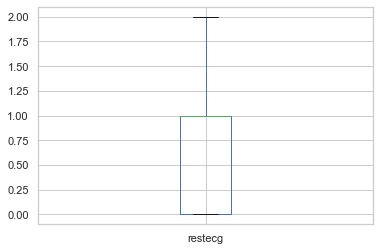

In [68]:
df['restecg'].plot.box()

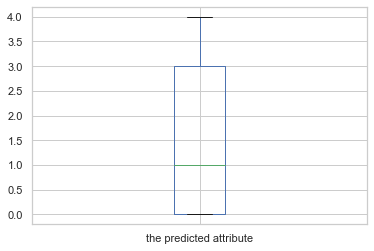

In [69]:
df['the predicted attribute'].plot.box()

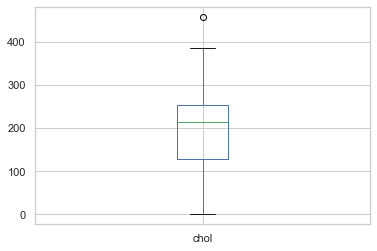

In [70]:
df['chol'].plot.box()

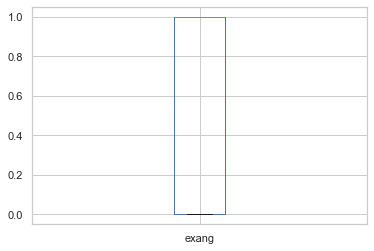

In [71]:
df['exang'].plot.box()

In [72]:
collist=df.columns.values
ncol=13
nrows=10

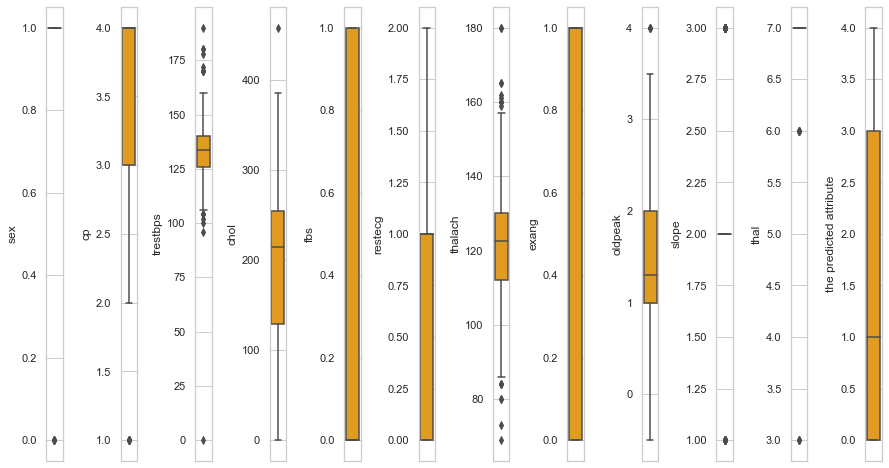

In [73]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='orange',orient='v')
    plt.tight_layout()

In [74]:
#check skewness
df.skew()

age                       -0.404091
sex                       -5.552105
cp                        -1.648734
trestbps                  -1.508389
chol                      -0.571836
fbs                        0.680636
restecg                    0.391463
thalach                    0.152603
exang                     -1.102593
oldpeak                    0.442196
slope                      0.210521
thal                      -5.920627
the predicted attribute    0.297393
dtype: float64

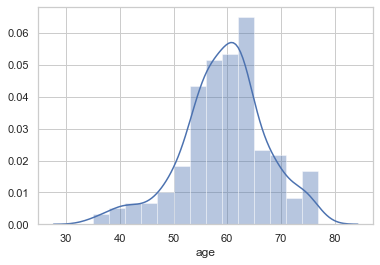

In [75]:
sns.distplot(df['age'])

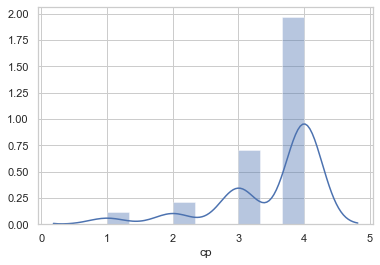

In [76]:
sns.distplot(df['cp'])

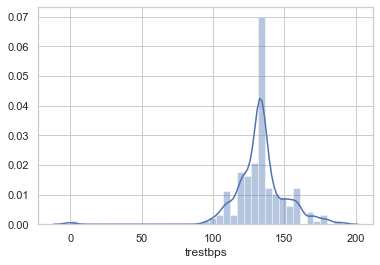

In [77]:
sns.distplot(df['trestbps'])

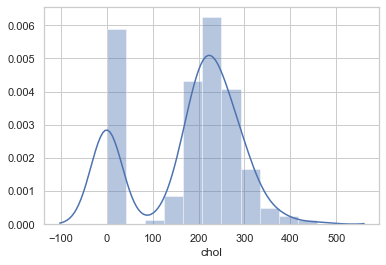

In [78]:
sns.distplot(df['chol'])

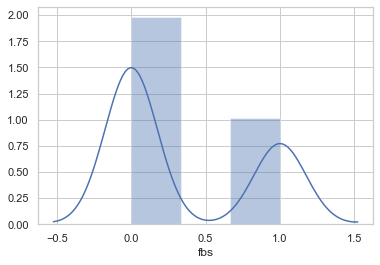

In [79]:
sns.distplot(df['fbs'])

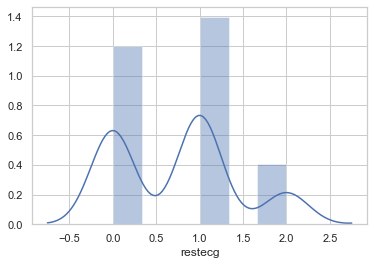

In [80]:
sns.distplot(df['restecg'])

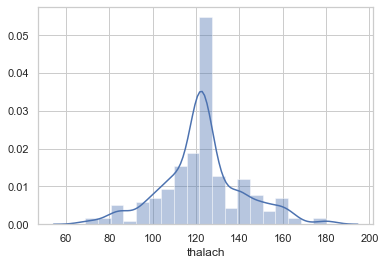

In [81]:
sns.distplot(df['thalach'])

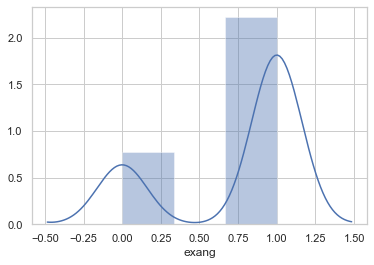

In [82]:
sns.distplot(df['exang'])

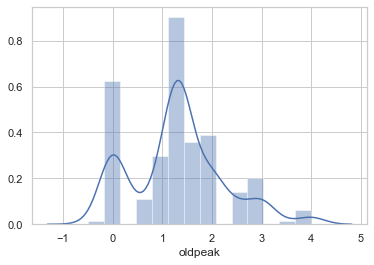

In [83]:
sns.distplot(df['oldpeak'])

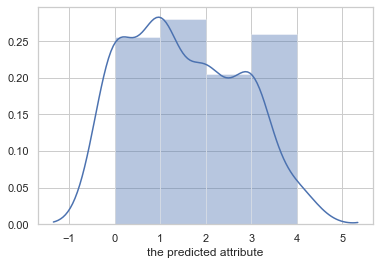

In [84]:
sns.distplot(df['the predicted attribute'])

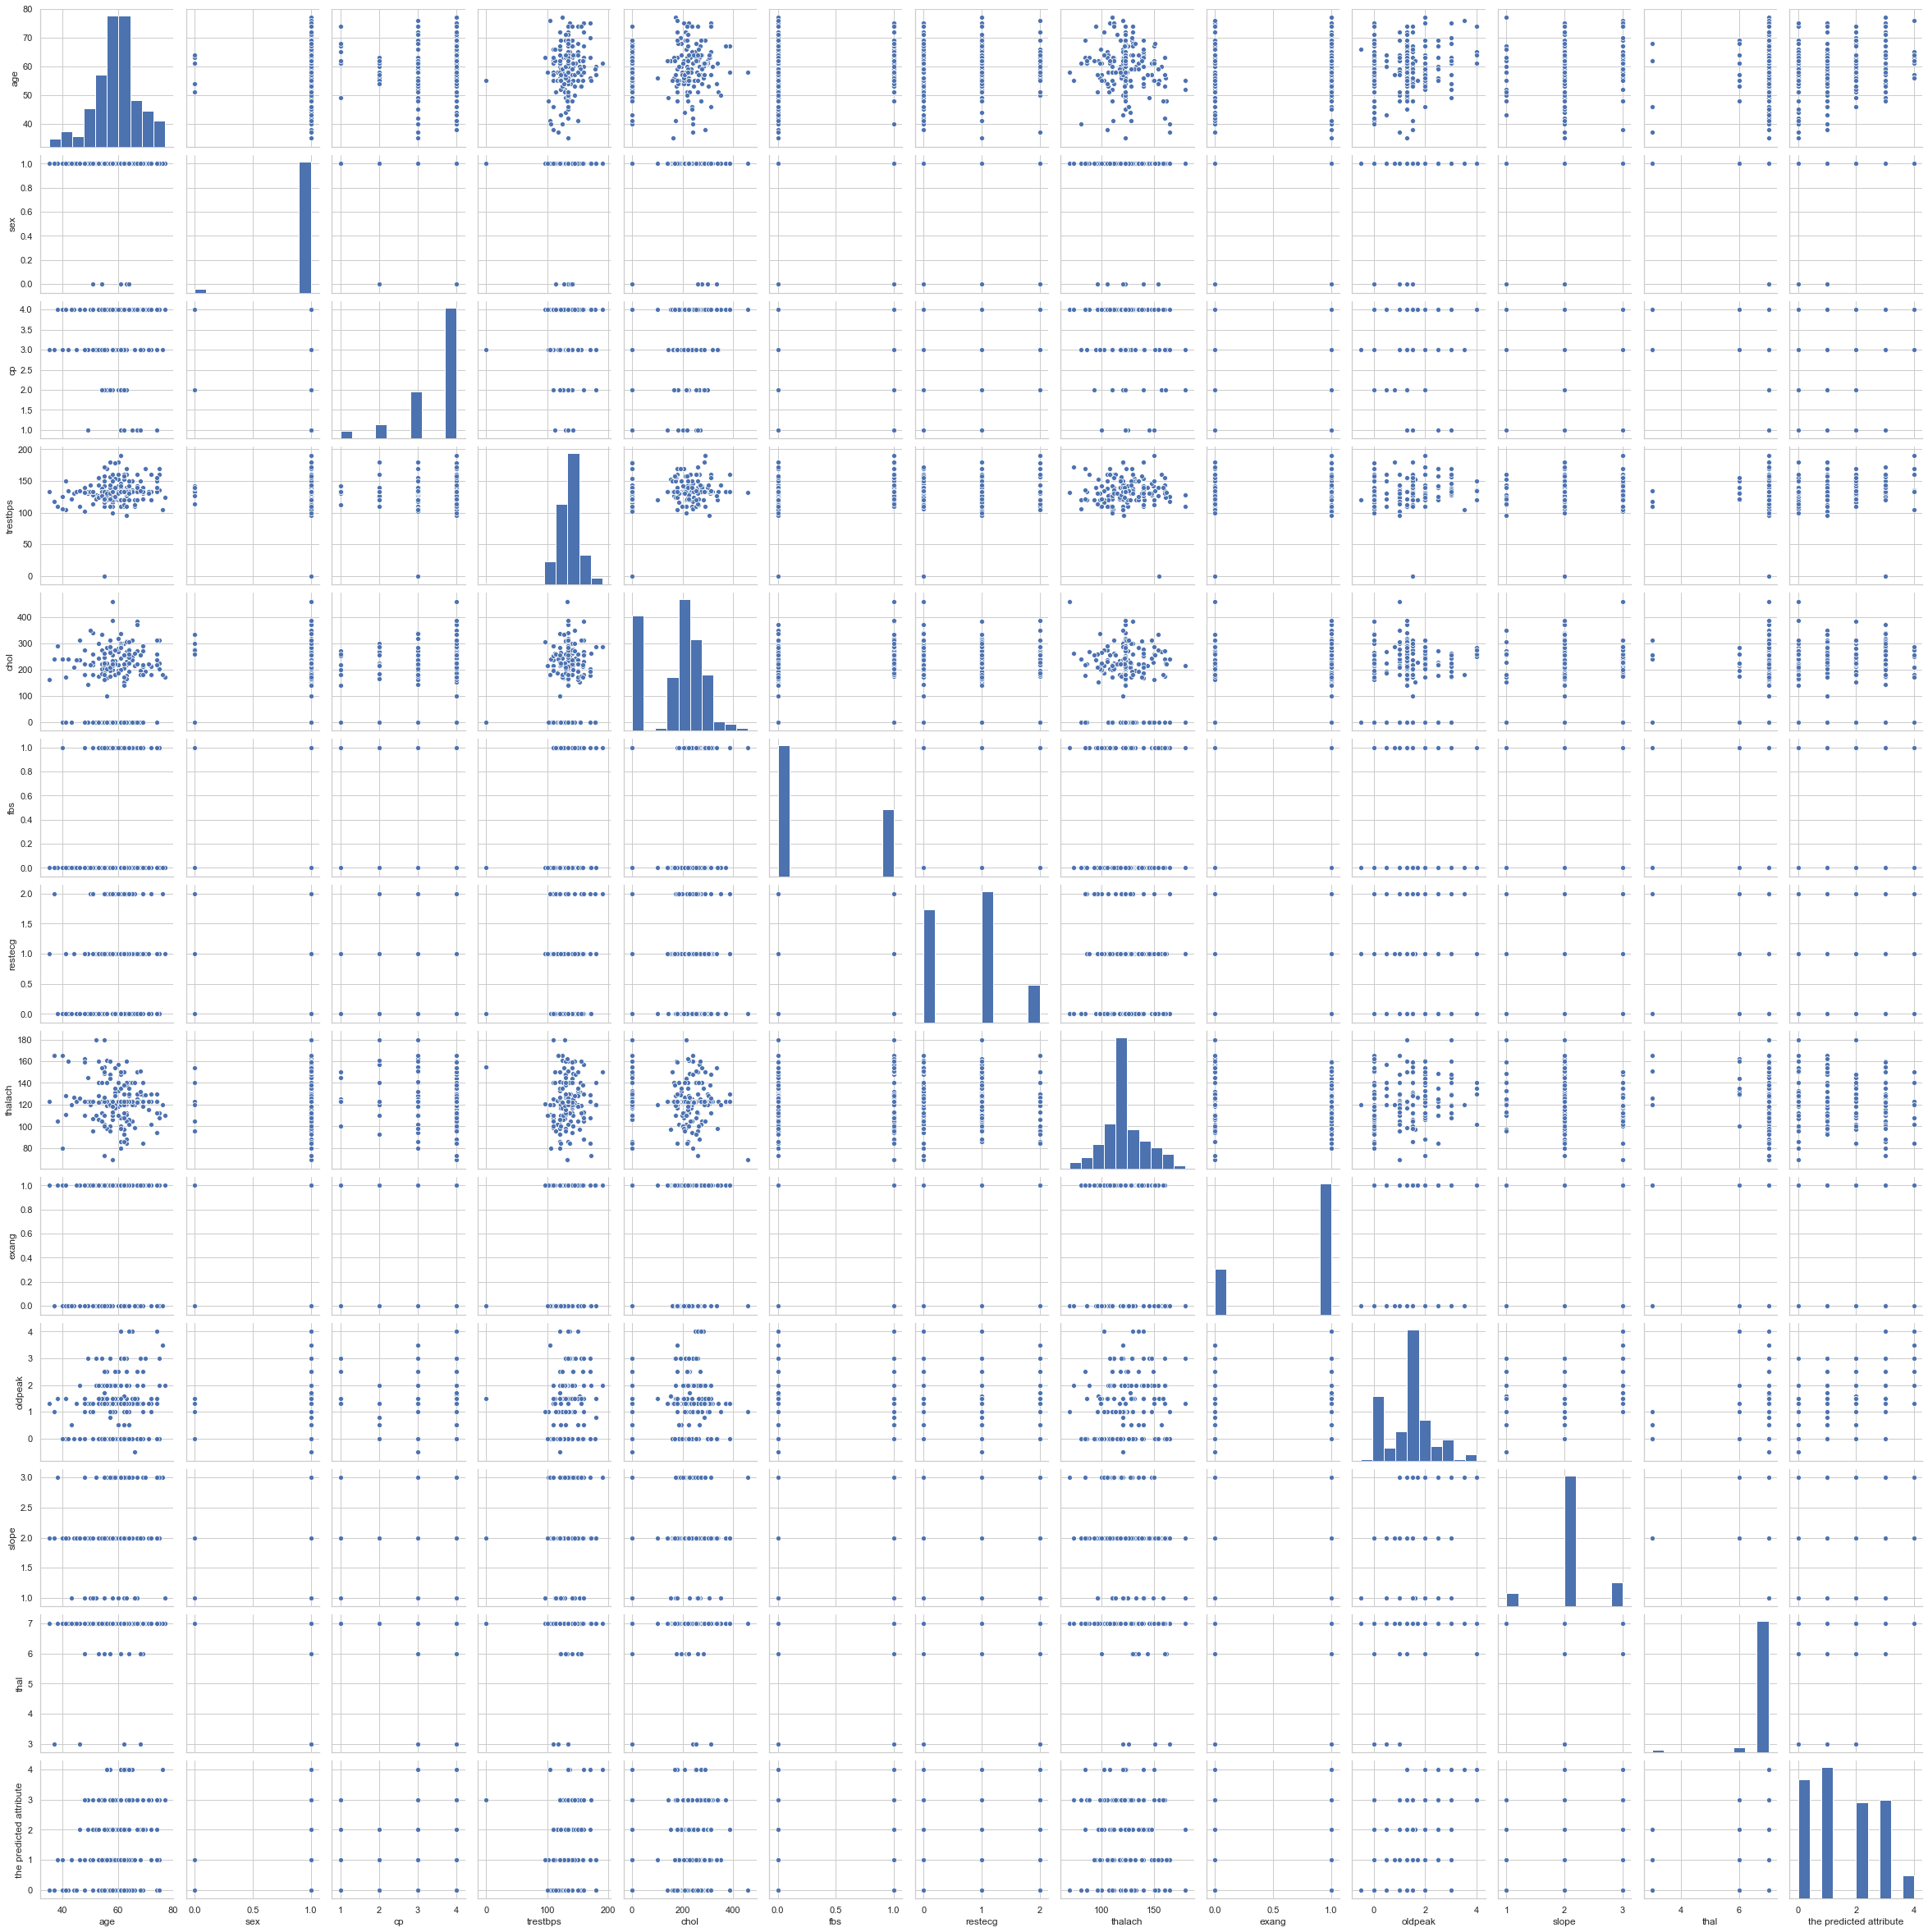

In [85]:
sns.pairplot(df)

In [86]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [87]:
Threshold=3
print(np.where(z>3))

(array([ 12,  24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128,
       131, 133, 137, 171, 176, 189, 190, 194, 195, 196], dtype=int64), array([11,  7,  3,  1,  2,  7,  2,  2,  1,  0,  2,  1,  1,  2,  2,  2, 11,
        3, 11,  1, 11,  1,  2], dtype=int64))


In [88]:
z[24][7]

3.0459707027304646

In [89]:
df_new=df[(z<3).all(axis=1)]

In [90]:
print(df.shape,df_new.shape)

(200, 13) (177, 13)


In [91]:
#27 outliers removed
df=df_new

In [92]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,the predicted attribute
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,7.0,2.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0,0.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0,2.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0,1.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,53.0,1.0,4.0,144.0,300.0,1.0,1.0,128.0,1.0,1.5,2.0,7.0,3.0
193,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,2.0,7.0,1.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,6.0,2.0
198,58.0,1.0,4.0,133.7,385.0,1.0,2.0,122.7,1.0,1.3,2.0,7.0,0.0


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x=df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,63.0,1.0,4.0,140.0,260.0,0.0,1.0,112.0,1.0,3.0,2.0,7.0
1,44.0,1.0,4.0,130.0,209.0,0.0,1.0,127.0,0.0,0.0,2.0,7.0
2,60.0,1.0,4.0,132.0,218.0,0.0,1.0,140.0,1.0,1.5,3.0,7.0
3,55.0,1.0,4.0,142.0,228.0,0.0,1.0,149.0,1.0,2.5,1.0,7.0
4,66.0,1.0,3.0,110.0,213.0,1.0,2.0,99.0,1.0,1.3,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,53.0,1.0,4.0,144.0,300.0,1.0,1.0,128.0,1.0,1.5,2.0,7.0
193,62.0,1.0,4.0,158.0,170.0,0.0,1.0,138.0,1.0,0.0,2.0,7.0
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,6.0
198,58.0,1.0,4.0,133.7,385.0,1.0,2.0,122.7,1.0,1.3,2.0,7.0


In [95]:
y=df.iloc[:,12:]
y

,the predicted attribute
0,2.0
1,0.0
2,2.0
3,1.0
4,0.0
...,...
192,3.0
193,1.0
197,2.0
198,0.0


In [96]:
print(x.shape,y.shape)

(177, 12) (177, 1)


In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.45580797,  0.        ,  0.60675092, ...,  1.76719554,
        -0.16873594,  0.21757132],
       [-2.06953337,  0.        ,  0.60675092, ..., -1.39340005,
        -0.16873594,  0.21757132],
       [ 0.05706986,  0.        ,  0.60675092, ...,  0.18689774,
         1.96456849,  0.21757132],
       ...,
       [-0.60749365,  0.        ,  0.60675092, ..., -1.39340005,
        -0.16873594, -4.59619408],
       [-0.20875554,  0.        ,  0.60675092, ..., -0.02380863,
        -0.16873594,  0.21757132],
       [ 0.32289526,  0.        , -2.74934012, ..., -1.39340005,
        -0.16873594,  0.21757132]])

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [99]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(141, 12) (36, 12)
(141, 1) (36, 1)


In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [101]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),LogisticRegression()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is:
0.3888888888888889
[[1 1 0 0 0]
 [3 4 2 1 0]
 [2 4 5 1 0]
 [0 2 0 4 1]
 [2 1 1 1 0]]
              precision    recall  f1-score   support

         0.0       0.12      0.50      0.20         2
         1.0       0.33      0.40      0.36        10
         2.0       0.62      0.42      0.50        12
         3.0       0.57      0.57      0.57         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.39        36
   macro avg       0.33      0.38      0.33        36
weighted avg       0.42      0.3

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predi

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.32      0.60      0.41        10
         2.0       0.00      0.00      0.00        12
         3.0       0.45      0.71      0.56         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.31        36
   macro avg       0.15      0.26      0.19        36
weighted avg       0.18      0.31      0.22        36



Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.16666666666666666
[[0 0 0 2 0]
 [3 4 2 1 0]
 [2 6 2 2 0]
 [0 6 1 0 0]
 [1 1 2 1 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.24      0.40      0.30        10
         2.0       0.29      0.17      0.21        

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.25
[[0 1 1 0 0]
 [3 5 2 0 0]
 [2 5 1 4 0]
 [0 4 0 3 0]
 [1 1 2 1 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.31      0.50      0.38        10
         2.0       0.17      0.08      0.11        12
         3.0       0.38      0.43      0.40         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.25        36
   macro avg       0.17      0.20      0.18        36
weighted avg       0.22      0.25      0.22        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=DecisionTreeClassifier(),n_estimator=50,learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.25
[[0 0 1 1 0]
 [2 3 2 3 0]
 [0 6 3 3 0]
 [0 1 3 3 0]
 [1 0 1 3 0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.30      0.30      0.30        10
         2.0       0.30      0.25      0.27        12
         3.0       0.23      0.43      0.30         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.25        36
   macro avg       0.17      0.20      0.17        36
weighted avg       0.23      0.25      0.23        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3055555555555556
[[1 0 1 0 0]
 [3 5 2 0 0]
 [3 6 2 1 0]
 [1 3 0 3 0]
 [1 1 1 2 0]]
              precision    recall  f1-score   support

         0.0       0.11      0.50      0.18         2
         1.0       0.33      0.50      0.40        10
         2.0       0.33      0.17      0.22        12
         3.0       0.50      0.43      0.46         7
         4.0       0.00      0.00      0.00         5

    accuracy                           0.31        36
   macro avg       0.26      0.32      0.25        36
weighted avg       0.31      0.31      0.29        36



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


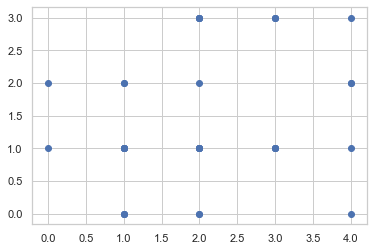

In [105]:
print(plt.scatter(x=y_test,y=predrf))
plt.show()

In [106]:
from sklearn.model_selection import cross_val_score
gnb=GaussianNB()

score=cross_val_score(gnb,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.16666667 0.11111111 0.16666667 0.27777778 0.05555556 0.11111111
 0.05555556 0.11764706 0.11764706 0.11764706]
0.12973856209150328
0.06064799529032491


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

In [111]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear','rbf','poly')}
sv=SVC()
clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'kernel': 'rbf'}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [114]:
sv=SVC(kernel='rbf')
sv.fit(x,y)
print(clf.best_score_)

0.3728571428571429


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AMONG ALL I CHOOSE DECISION TREE CLASSIFIER 

In [130]:
#saving the model
from joblib import dump,load
dump(hd,'HEART_DISEASE_project.joblib')

['HEART_DISEASE_project.joblib']